In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re

df = pd.read_csv("../dataset/st_business_articles.csv")
def clean_text(text): 
    if pd.isna(text):
        return ""
    AD_TEXT = "Sign up now: Get ST's newsletters delivered to your inbox"
    if AD_TEXT in text:
        text = text.replace(AD_TEXT, "")
    # Remove HTML entities
    text = re.sub(r'&[a-z]+;', ' ', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    text = text.strip()
    text = ' '.join(text.split())
    text = text.replace('\n', ' ').replace('\r', ' ')
    return text

df['title'] = df['title'].apply(clean_text)
df['summary'] = df['summary'].apply(clean_text)


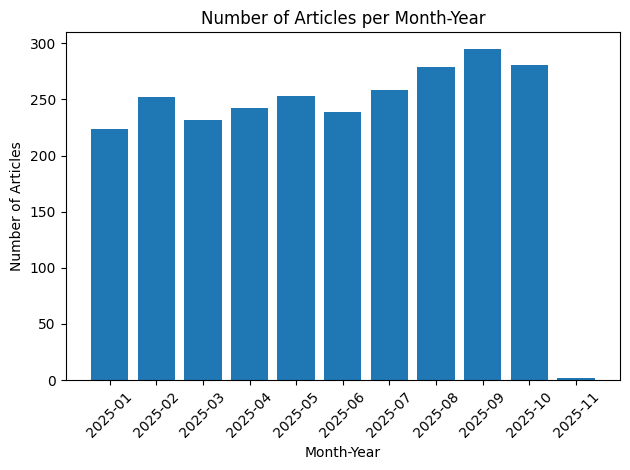

In [53]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['YearMonth'] = df['date'].dt.to_period('M')  # e.g., 2025-10

# Count articles per month-year
df_month_count = df['YearMonth'].value_counts().sort_index()

# Plot
plt.bar(df_month_count.index.astype(str), df_month_count.values)
plt.xlabel("Month-Year")
plt.ylabel("Number of Articles")
plt.title("Number of Articles per Month-Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


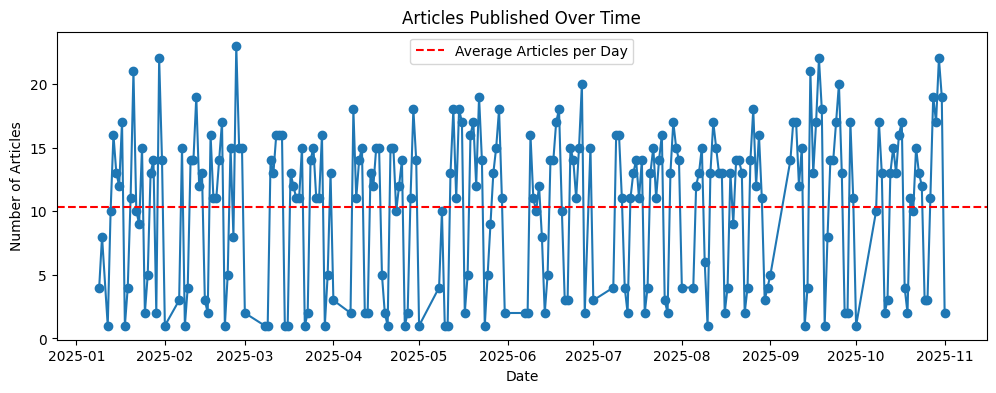

In [40]:
df_date_count = df["date_only"].value_counts().sort_index().reset_index()

plt.figure(figsize=(12, 4))
plt.plot(df_date_count['date_only'], df_date_count['count'], marker='o')
plt.title("Articles Published Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.axhline(y=df_date_count["count"].mean(), color='r', linestyle='--', label='Average Articles per Day')
plt.legend()
plt.show()

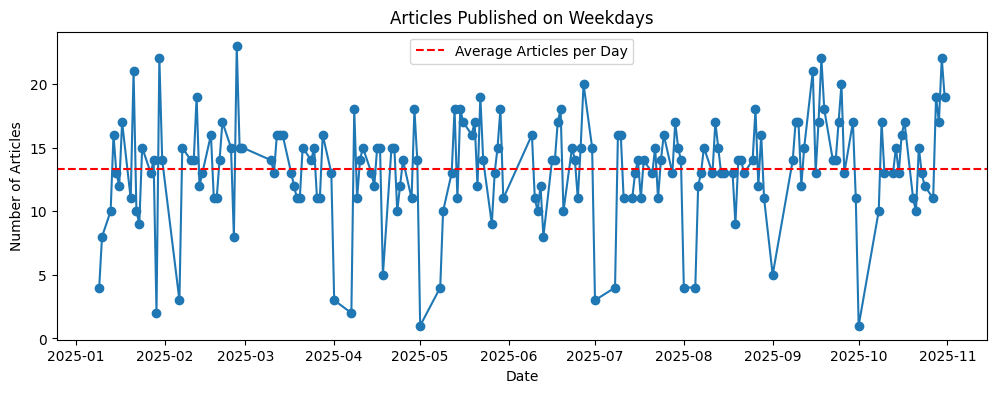

Average News Articles per day: 13.33


In [41]:
df_weekdays = df[df['date'].dt.dayofweek < 5]
df_weekdays_count = df_weekdays["date_only"].value_counts().sort_index().reset_index()

plt.figure(figsize=(12, 4))
plt.plot(df_weekdays_count['date_only'], df_weekdays_count['count'], marker='o')
plt.title("Articles Published on Weekdays")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.axhline(y=df_weekdays_count["count"].mean(), color='r', linestyle='--', label='Average Articles per Day')
plt.legend()
plt.show()

print("Average News Articles per day: " + str(round(df_weekdays_count["count"].mean(), 2)))

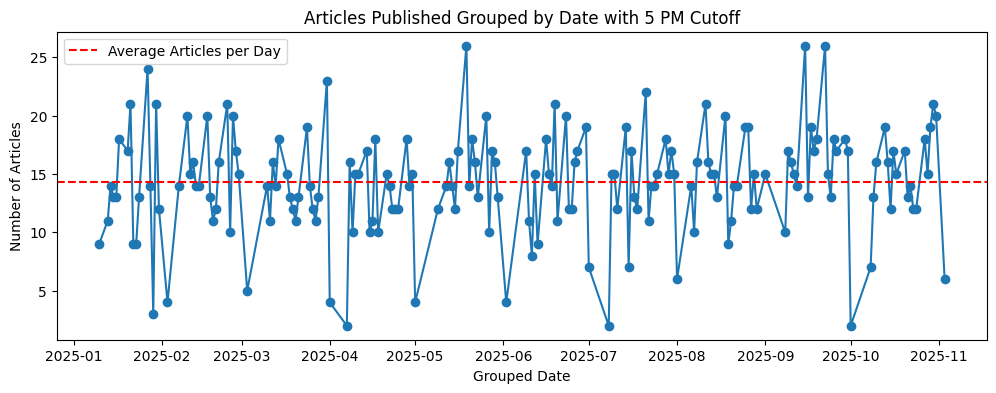

Average News Articles per day: 14.28
4.467403334054143


In [ ]:
# Group articles by date 
def get_group_date(dt):
    # Determine preliminary day based on 5 PM cutoff
    if dt.hour >= 17:
        group_dt = dt + timedelta(days=1)
    else:
        group_dt = dt

    # Weekend handling: Friday 5 PM → Monday 5 PM
    weekday = group_dt.weekday()  # Monday=0, Sunday=6
    # If the adjusted date falls on Saturday (5) or Sunday (6), shift to Monday
    if weekday == 5:  # Saturday
        group_dt += timedelta(days=2)  # Saturday → Monday
    elif weekday == 6:  # Sunday
        group_dt += timedelta(days=1)  # Sunday → Monday

    return pd.Timestamp(group_dt.date())

# Apply the grouping function
df['group_date'] = df['date'].apply(get_group_date)

df_grouped = df['group_date'].value_counts().sort_index().reset_index()
plt.figure(figsize=(12, 4))
plt.plot(df_grouped['group_date'], df_grouped['count'], marker='o')
plt.title("Articles Published Grouped by Date with 5 PM Cutoff")
plt.xlabel("Grouped Date")
plt.ylabel("Number of Articles")
plt.axhline(y=df_grouped["count"].mean(), color='r', linestyle='--', label='Average Articles per Day')
plt.legend()
plt.show()

print("Average News Articles per day: " + str(round(df_grouped["count"].mean(), 2)))

print(df_grouped["count"].std())

Average News Articles per day: 14.28


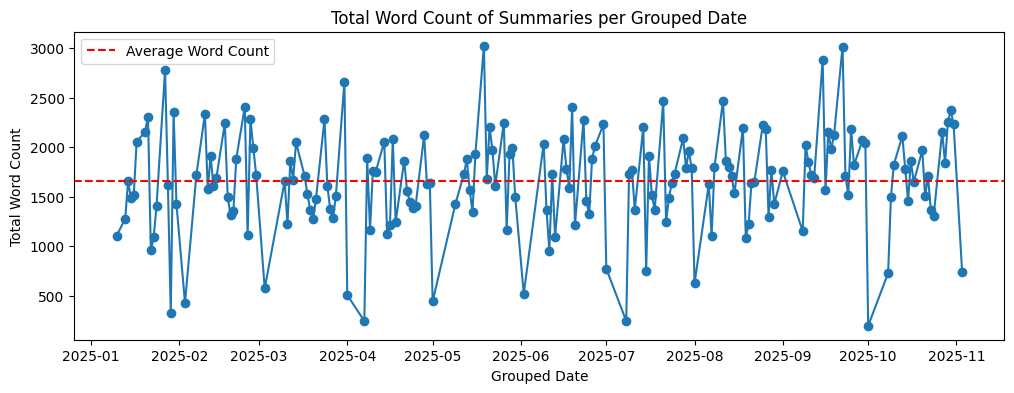

In [50]:
daily_articles_df = df.groupby('group_date').agg(
    titles=('title', lambda x: " ".join(x)),
    summaries=('summary', lambda x: " ".join(x)),
    article_count=('title', 'count'),
    urls=('url', lambda x: "|".join(x))
).reset_index()

daily_articles_df['word_count'] = daily_articles_df['summaries'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 4))
plt.plot(daily_articles_df['group_date'], daily_articles_df['word_count'], marker='o')
plt.title("Total Word Count of Summaries per Grouped Date")
plt.axhline(y=daily_articles_df['word_count'].mean(), color='r', linestyle='--', label='Average Word Count')
plt.legend()
plt.xlabel("Grouped Date")
plt.ylabel("Total Word Count")

print("Average News Articles per day: " + str(round(df_grouped["count"].mean(), 2)))